# BANK APP REVIEWS - BOA

In [130]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [131]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [132]:
warnings.filterwarnings("ignore")

In [133]:
# variable
BANK="BOA"

In [134]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

### 📌 Project Overview

#### CBE APP Reviews


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [135]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/BOA_raw_reviews.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (500, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,3559b91c-fad9-4032-bebe-cf99974b9628,Robel Alebachew,https://play-lh.googleusercontent.com/a/ACg8oc...,"Hello, I’m facing a problem with the BOA Mobil...",1,0,NaN,2025-06-03 16:21:34,NaN,NaN
1,10e85f30-540d-4810-ba89-85a7e004480b,Haymanot Anberber,https://play-lh.googleusercontent.com/a/ACg8oc...,exceptional,5,0,NaN,2025-06-03 10:32:35,NaN,NaN
2,d7f07898-4ba1-47b4-9e8c-a3cc10b1bf0f,Mohamed Abdillahi,https://play-lh.googleusercontent.com/a-/ALV-U...,BoA Mobile good bank,5,0,25.05.03,2025-06-02 14:25:12,NaN,NaN
3,2ca9480b-ff5f-4b59-952c-5921db83dab2,Ahadu tech,https://play-lh.googleusercontent.com/a-/ALV-U...,this is worest app 24/7 loading,1,0,25.05.03,2025-06-01 15:51:10,NaN,NaN
4,8cd852da-0257-4ca0-9003-314fb464e55a,Fentaw Kefyalew,https://play-lh.googleusercontent.com/a-/ALV-U...,This App is not interest for Android phone Ple...,1,0,NaN,2025-06-01 10:17:10,NaN,NaN


### Dataset Overview

In [136]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
291,49b877c9-5536-4be5-8674-e3ae975fa0ed,Cyber boy,https://play-lh.googleusercontent.com/a/ACg8oc...,I downloaded the app for the first time while ...,1,1,NaN,2025-03-03 09:24:29,NaN,NaN
268,643f52aa-9981-4dfb-b058-573537f62ce5,Miky Mal,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,1,25.03.07,2025-03-19 21:15:38,NaN,NaN
439,df1d7402-68cb-4f20-ae7f-d02866690692,Shimelis Keterew,https://play-lh.googleusercontent.com/a/ACg8oc...,አይከፍትም እኮ,1,0,25.03.07,2025-04-17 10:12:16,NaN,NaN
27,62fa097e-3fd8-4522-a3a3-9b13f17f594d,Ahmed Abdo Bedaso,https://play-lh.googleusercontent.com/a-/ALV-U...,"This app future is good, but there is problems...",1,2,NaN,2025-05-06 18:06:33,NaN,NaN
56,2ac5df83-d25c-41c5-ae60-64c7a77159c5,Aklilu Keshura,https://play-lh.googleusercontent.com/a/ACg8oc...,good application,5,0,NaN,2025-03-30 21:56:40,NaN,NaN
200,3559b91c-fad9-4032-bebe-cf99974b9628,Robel Alebachew,https://play-lh.googleusercontent.com/a/ACg8oc...,"Hello, I’m facing a problem with the BOA Mobil...",1,0,NaN,2025-06-03 16:21:34,NaN,NaN
449,8eed1a6d-6902-45fe-abc4-48dcbae22f85,Esubalew Yismaw,https://play-lh.googleusercontent.com/a-/ALV-U...,the app gets a considerable improvements like ...,5,20,25.03.07,2025-04-04 22:57:29,NaN,NaN
471,26f2b9fc-1707-4e54-b04d-c9915a1e9a54,Ararsa Dabale,https://play-lh.googleusercontent.com/a/ACg8oc...,wonderful,5,1,NaN,2025-03-19 13:58:10,NaN,NaN
68,643f52aa-9981-4dfb-b058-573537f62ce5,Miky Mal,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,1,25.03.07,2025-03-19 21:15:38,NaN,NaN
89,ab512ec6-2eaa-496c-b0a9-ee21a2d810be,GENENE NUSI,https://play-lh.googleusercontent.com/a-/ALV-U...,AGA B Girja Miss language of admin Afaan oromo...,1,0,NaN,2025-03-04 20:03:40,NaN,NaN


In [137]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
495,d5e46c35-6bbf-4ce7-b184-cdc4c1e0eab1,Diriba Desu,https://play-lh.googleusercontent.com/a/ACg8oc...,Verry Amazing App from all IB,5,0,NaN,2025-03-01 11:35:08,NaN,NaN
496,99172a2f-926c-48be-a1b0-3971b984b6b2,Zenebe Abebe,https://play-lh.googleusercontent.com/a-/ALV-U...,Not working on this days,1,0,24.11.22,2025-02-26 13:29:28,NaN,NaN
497,781ff61a-6f89-4bb1-a455-9b66400b0cd7,fitsum tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,Thank you BoA,5,1,24.11.22,2025-02-23 11:06:47,NaN,NaN
498,cf026bee-94e7-4b9c-8a46-034354f9d171,Eshetu Amsal,https://play-lh.googleusercontent.com/a/ACg8oc...,best banking app in the wworld,5,1,NaN,2025-02-22 19:58:17,NaN,NaN
499,9035f28b-9646-4fe9-80e1-6b6926b0289e,Yebelay Getnet,https://play-lh.googleusercontent.com/a-/ALV-U...,Nice app and it's easy to use,5,2,24.11.22,2025-02-21 12:41:42,NaN,NaN


In [138]:
#shape of the dataset
df.shape

(500, 10)

In [139]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [140]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,500.0,3.254,1.855902,1.0,1.0,4.0,5.0,5.0
thumbsUpCount,500.0,4.814,29.486307,0.0,0.0,1.0,1.0,425.0
replyContent,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repliedAt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,500,200,3559b91c-fad9-4032-bebe-cf99974b9628,3
userName,500,200,Robel Alebachew,3
userImage,500,200,https://play-lh.googleusercontent.com/a/ACg8oc...,3
content,500,177,good,29
reviewCreatedVersion,349,7,24.11.22,159
at,500,200,2025-06-03 16:21:34,3


In [142]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              500 non-null    object 
 1   userName              500 non-null    object 
 2   userImage             500 non-null    object 
 3   content               500 non-null    object 
 4   score                 500 non-null    int64  
 5   thumbsUpCount         500 non-null    int64  
 6   reviewCreatedVersion  349 non-null    object 
 7   at                    500 non-null    object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 39.2+ KB


In [143]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                200
userName                200
userImage               200
at                      200
content                 177
thumbsUpCount            18
reviewCreatedVersion      7
score                     5
replyContent              0
repliedAt                 0
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [144]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [145]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
replyContent,500,100.00%
repliedAt,500,100.00%
reviewCreatedVersion,151,30.20%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
content,0,0.00%
score,0,0.00%
thumbsUpCount,0,0.00%
at,0,0.00%


### Missing Values

In [146]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,500,100.00%
repliedAt,500,100.00%
reviewCreatedVersion,151,30.20%


### Duplicates

In [147]:
#count duplicates
dq.count_duplicates()

300

In [148]:
#look at the duplicates
dq.display_duplicates().sample(10)

[INFO] Found 300 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
337,06692c6b-978f-4b52-bb83-6c38a11b2822,Ismael Abdella,https://play-lh.googleusercontent.com/a/ACg8oc...,this app is not available,1,0,24.07.04,2025-01-02 08:46:51,NaN,NaN
470,c5cdb617-4335-491d-89ce-9c1aab9b0b2f,Noah Daniel,https://play-lh.googleusercontent.com/a/ACg8oc...,"For anyone who wants to download it, just don'...",1,0,25.03.07,2025-03-19 16:02:57,NaN,NaN
286,1962d1c4-e2c2-4ac7-91b6-b0a75ae11d7a,Abel Tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,Worst mobile banking app I ever experienced I ...,1,5,24.11.22,2025-03-06 22:44:28,NaN,NaN
281,c9f8ff21-b8d1-400f-bb94-c98399a25ad5,Bamlak Sintayehu,https://play-lh.googleusercontent.com/a-/ALV-U...,"The bug is still there,the app crashes every t...",1,1,NaN,2025-03-10 20:11:15,NaN,NaN
253,91372113-f427-4e6d-892a-571e1c40eee6,Raiis Rashaad,https://play-lh.googleusercontent.com/a-/ALV-U...,thank you,5,0,24.09.30,2025-04-02 03:33:00,NaN,NaN
275,c9a192de-b018-4dde-b0d0-b0201be0c3f7,Abdu Mille,https://play-lh.googleusercontent.com/a/ACg8oc...,Wow,1,0,25.03.07,2025-03-14 03:37:53,NaN,NaN
437,3271d45f-2900-41b6-878c-669ac563e60a,Abel Hubena,https://play-lh.googleusercontent.com/a-/ALV-U...,It keeps showing this pop up to turn off devel...,1,11,25.03.07,2025-04-19 07:15:54,NaN,NaN
318,591be00c-a536-4f4a-9095-1c6dfa6afe14,Ashenafi Tamene,https://play-lh.googleusercontent.com/a-/ALV-U...,😡😡😡🤬🤬🤬,1,0,24.11.22,2025-01-16 12:46:26,NaN,NaN
446,3b48fff7-6b38-4099-9c7c-cabc1bbbd92b,Bezawit Wondmagegne,https://play-lh.googleusercontent.com/a/ACg8oc...,it just doesn't work...so frustrating,1,0,NaN,2025-04-07 18:04:17,NaN,NaN
284,1cfcfa11-67f5-4315-9f2d-f47ab27f0910,abrar yasin,https://play-lh.googleusercontent.com/a/ACg8oc...,Wonderfull app,5,0,NaN,2025-03-08 10:23:26,NaN,NaN


### Invalid Values

In [149]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [150]:
#saving the original dataset for later use
df_original=df.copy()

In [151]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 300 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
20,49377d51-ea44-483e-a596-3d5bed4b3f9a,Mohammed Siraj,https://play-lh.googleusercontent.com/a-/ALV-U...,excellent,5,0,NaN,2025-05-15 15:42:43,NaN,NaN
145,2d52d1a5-525c-4655-b858-e8d0d2e20bc2,Abemelek Fasika,https://play-lh.googleusercontent.com/a-/ALV-U...,Why is not letting me access my account. The w...,1,8,24.11.22,2024-12-27 13:28:26,NaN,NaN
35,8a4d9c01-9e5a-4732-a8ab-9341930b30c8,Nahom Abebe,https://play-lh.googleusercontent.com/a/ACg8oc...,the app isn't working after it asked me the pa...,3,4,25.03.07,2025-04-20 21:05:21,NaN,NaN
6,78c924d7-0a65-415c-9fca-bda9b078a157,Kibrom Mebrahtu,https://play-lh.googleusercontent.com/a/ACg8oc...,very nice Abyssinia bank is choice all,5,0,25.05.03,2025-05-31 11:55:58,NaN,NaN
53,91372113-f427-4e6d-892a-571e1c40eee6,Raiis Rashaad,https://play-lh.googleusercontent.com/a-/ALV-U...,thank you,5,0,24.09.30,2025-04-02 03:33:00,NaN,NaN


In [152]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [153]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
172,8c12373b-e19d-494f-8506-a54490d9709b,Ephi T,https://play-lh.googleusercontent.com/a/ACg8oc...,I don't know why but your apps start out great...,1,0,NaN,2024-11-28 11:44:51,NaN,NaN
190,3d362e0c-4c39-498b-8b61-b52226effacd,Daniel Berhanu,https://play-lh.googleusercontent.com/a-/ALV-U...,The worst app update ever. Why would you inclu...,1,22,24.09.30,2024-11-17 22:11:45,NaN,NaN
76,7d475f3a-15b4-4e56-ae4b-1fc451749e61,Betanoise Shi,https://play-lh.googleusercontent.com/a-/ALV-U...,"Edit: New bug, app not letting me type in my o...",1,130,25.03.07,2025-03-12 22:41:25,NaN,NaN
155,8b6153b2-b998-4cc2-bae6-a27ff50642c9,Muse Naykin,https://play-lh.googleusercontent.com/a/ACg8oc...,Bank of abissena,1,0,NaN,2024-12-17 21:21:09,NaN,NaN
192,f106cb33-9dcb-4a38-a65d-3cbb1a9a790e,abay,https://play-lh.googleusercontent.com/a/ACg8oc...,One of the poorest mobile banking system,1,0,24.09.30,2024-11-13 13:35:40,NaN,NaN


In [154]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] Dropping 2 empty column(s): ['replyContent', 'repliedAt']


In [155]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion']


In [156]:
dq.find_invalid_values()

{}

In [157]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [158]:
df=await dq.translate_non_english_text("content")

INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=fr&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=exceptional "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=good "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=af&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=very+good "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=BoA+Mobile+good+bank "HTTP/2 200 OK"
INFO:httpx:HTTP 

In [159]:
df.shape

(200, 5)

### Inconsistencies and Inaccuracies

In [160]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [161]:
df=dq.convert_columns_to_datetime()

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       200 non-null    object
 1   content        200 non-null    object
 2   score          200 non-null    int64 
 3   thumbsUpCount  200 non-null    int64 
 4   at             200 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.4+ KB


In [163]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [164]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [165]:
df["bank"] = BANK  # add bank name column
df["source"] = "Google Store"  # add source column

In [166]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank,source
21,ሞላዬ ከበደ,5,2025-05-14 15:47:57,Mule Kebede,0,BOA,Google Store
157,"Easy and sooo simple to use it, also its easy ...",3,2024-12-16 13:02:26,Natnael Zelalem,0,BOA,Google Store
37,It keeps showing this pop up to turn off devel...,1,2025-04-19 07:15:54,Abel Hubena,11,BOA,Google Store
100,please add language in the apps setting(amhari...,1,2025-02-15 18:15:50,miki,3,BOA,Google Store
176,Best,5,2024-11-25 19:10:50,Berhan Nurleigzer,1,BOA,Google Store
164,This is the best app; many features are awesom...,4,2024-12-08 23:16:05,Siem Kibrom,38,BOA,Google Store
162,Your system is the worst you should do better ...,2,2024-12-11 06:08:14,Aman Abebe,0,BOA,Google Store
113,Whenever I try to sign in app close please fix...,2,2025-01-21 19:34:22,Chol Kur,0,BOA,Google Store
76,"Edit: New bug, app not letting me type in my o...",1,2025-03-12 22:41:25,Betanoise Shi,130,BOA,Google Store
103,Best bank,5,2025-02-08 11:08:52,Huzeyfa Jemal,1,BOA,Google Store


### Export Cleaned Data

In [167]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

## 6. Analyze & Visualize

In [168]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


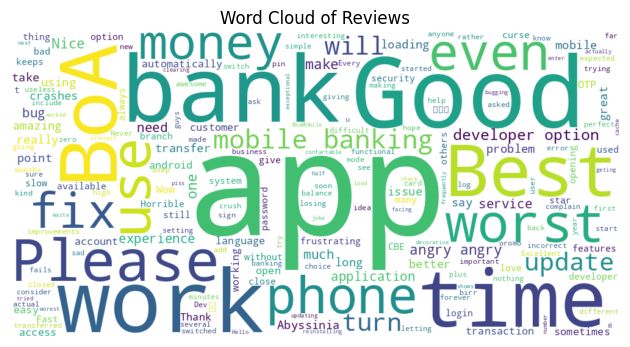

In [169]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


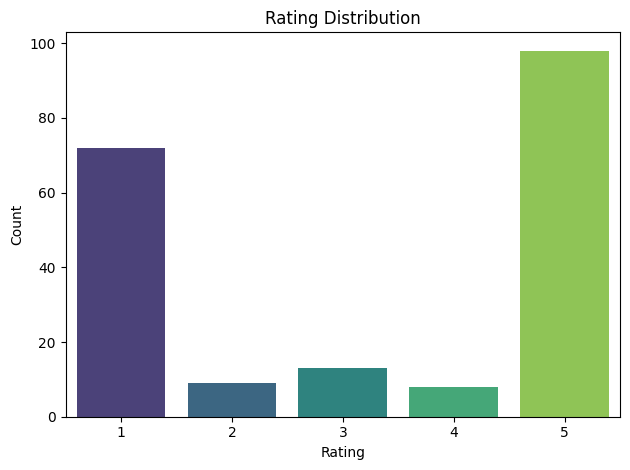

In [170]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


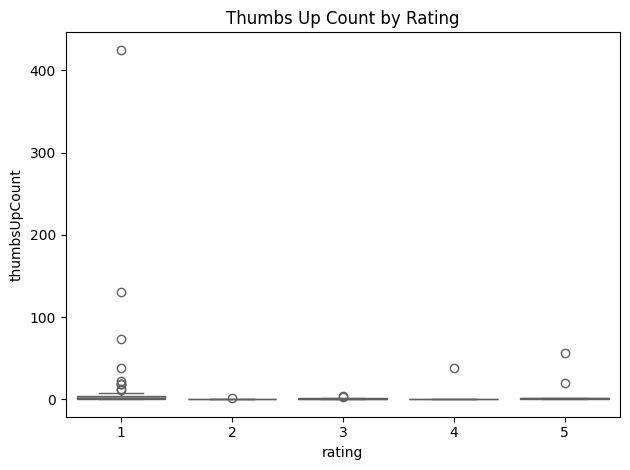

In [171]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


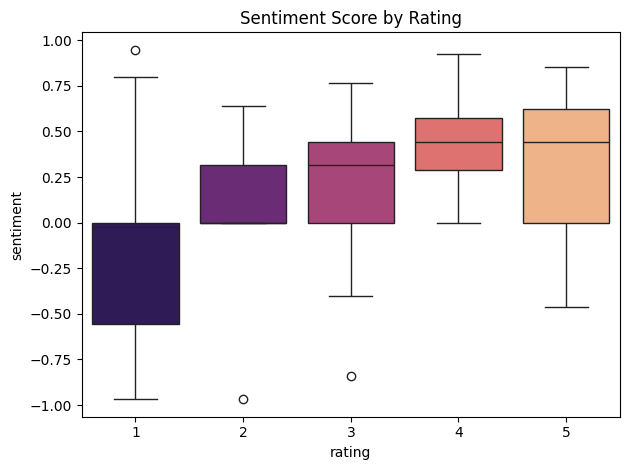

In [172]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

In [173]:
df=dq.drop_columns(['userName','thumbsUpCount'])

[INFO] Dropped columns: ['userName', 'thumbsUpCount']


In [174]:
df.sample(15)

,review,rating,date,bank,source
44,faster bank of Abissinya,5,2025-04-08 16:36:23,BOA,Google Store
187,Goat,5,2024-11-19 16:48:41,BOA,Google Store
191,Very good,5,2024-11-14 15:52:39,BOA,Google Store
52,very good,5,2025-04-03 08:50:56,BOA,Google Store
77,Improved to be the best,5,2025-03-11 12:32:31,BOA,Google Store
142,Lemn Embi Yilal ??,5,2024-12-30 16:01:11,BOA,Google Store
35,the app isn't working after it asked me the pa...,3,2025-04-20 21:05:21,BOA,Google Store
56,good application,5,2025-03-30 21:56:40,BOA,Google Store
71,wonderful,5,2025-03-19 13:58:10,BOA,Google Store
55,after activated the application it not allowed...,1,2025-03-31 23:55:06,BOA,Google Store
